In [1]:
import os
mat_file_path = 'emnist-letters.mat'
if not os.path.exists(mat_file_path):
    print("Il file non esiste:", mat_file_path)
else:
    print("Il file esiste, procedo con il caricamento.")

Il file esiste, procedo con il caricamento.


In [ ]:
%pip install scipy
%pip install matplotlib
%pip install numpy
%pip install tensorflow
%pip install PIL

In [ ]:

import scipy.io
import numpy as np

# Correct the file path to the actual location of your downloaded file
mat_file_path = 'emnist-letters.mat'  # Replace with the correct path
# OR, for google colab:
# from google.colab import files
# uploaded = files.upload()
# mat_file_path = list(uploaded.keys())[0]

def load_emnist_letters(mat_file_path):
    # Carica il file .mat
    mat = scipy.io.loadmat(mat_file_path)

    # La struttura del file .mat è complessa: solitamente i dati sono contenuti in mat['dataset']
    dataset = mat['dataset']

    # Estrazione dei dati. Gli indici potrebbero variare leggermente in base alla versione del file
    train_images = dataset['train'][0,0]['images'][0,0]
    train_labels = dataset['train'][0,0]['labels'][0,0]
    test_images = dataset['test'][0,0]['images'][0,0]
    test_labels = dataset['test'][0,0]['labels'][0,0]

    # Le immagini sono salvate come vettori, da rimodellare in 28x28
    train_images = train_images.reshape((-1, 28, 28))
    test_images = test_images.reshape((-1, 28, 28))

    # Alcuni file EMNIST richiedono una trasposizione per visualizzare correttamente le immagini
    train_images = np.transpose(train_images, (0, 2, 1))
    test_images = np.transpose(test_images, (0, 2, 1))

    return train_images, train_labels, test_images, test_labels


train_images, train_labels, test_images, test_labels = load_emnist_letters(mat_file_path)

# Aggiungi il canale per la CNN
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\picch\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Examples from the training set:


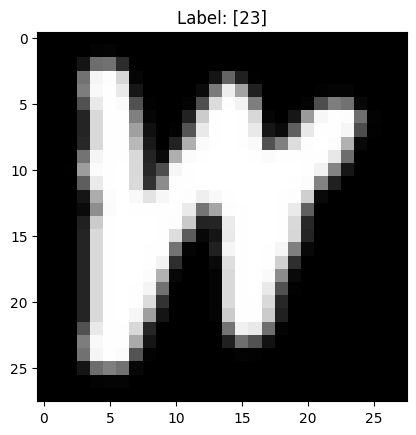

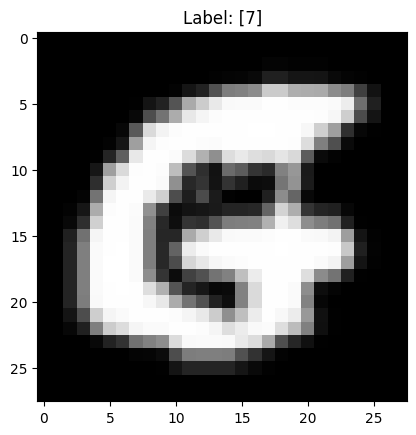

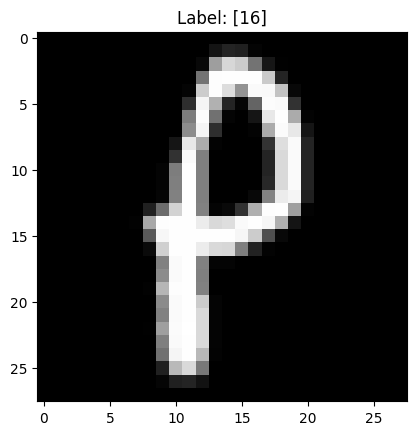

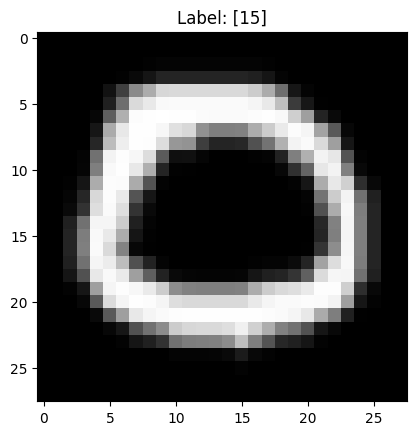

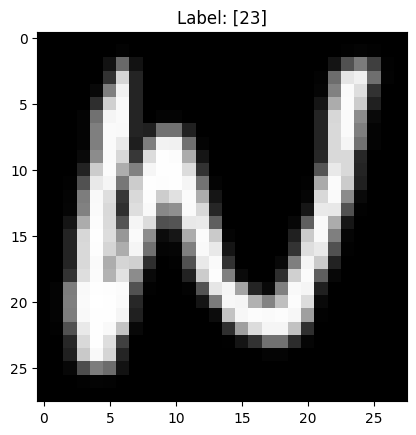


Examples from the test set:


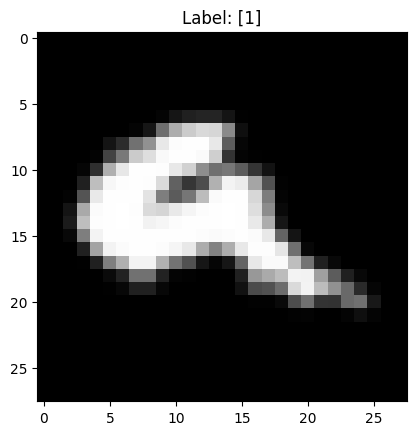

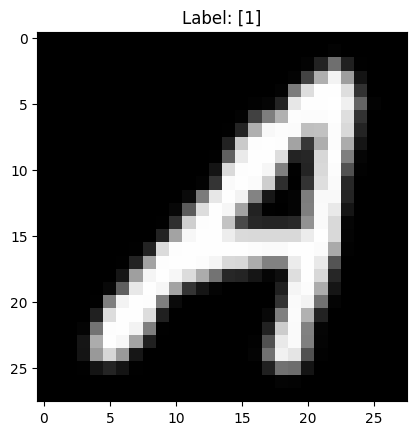

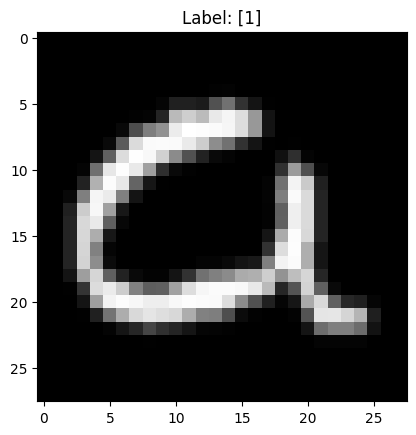

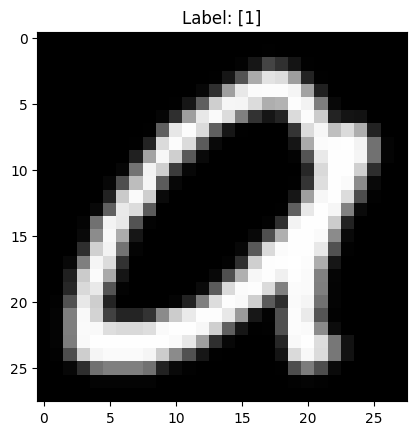

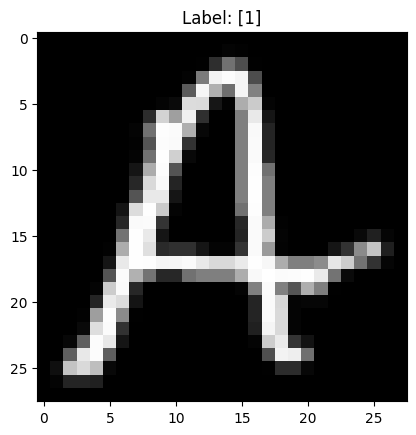

In [5]:
# prompt: print all the dataset to see the train and test images

import matplotlib.pyplot as plt

# Print some examples from the training set
print("Examples from the training set:")
for i in range(5):  # Print the first 5 images
    plt.imshow(train_images[i,:,:,0], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.show()

# Print some examples from the test set
print("\nExamples from the test set:")
for i in range(5):  # Print the first 5 images
    plt.imshow(test_images[i,:,:,0], cmap='gray')
    plt.title(f"Label: {test_labels[i]}")
    plt.show()


In [6]:
# prompt: stampare le classi del dataset con le lettere relative

import string

# Assuming train_labels contains the numerical labels
unique_labels = np.unique(train_labels)

# Create a mapping from numerical labels to letters
mapping = {}
for i, label in enumerate(unique_labels):
    mapping[label] = string.ascii_uppercase[i]

print("Classes with corresponding letters:")
for label, letter in mapping.items():
    print(f"Label {label}: Letter {letter}")


Classes with corresponding letters:
Label 1: Letter A
Label 2: Letter B
Label 3: Letter C
Label 4: Letter D
Label 5: Letter E
Label 6: Letter F
Label 7: Letter G
Label 8: Letter H
Label 9: Letter I
Label 10: Letter J
Label 11: Letter K
Label 12: Letter L
Label 13: Letter M
Label 14: Letter N
Label 15: Letter O
Label 16: Letter P
Label 17: Letter Q
Label 18: Letter R
Label 19: Letter S
Label 20: Letter T
Label 21: Letter U
Label 22: Letter V
Label 23: Letter W
Label 24: Letter X
Label 25: Letter Y
Label 26: Letter Z


In [7]:
print("Dimensione train_images:", train_images.shape)

Dimensione train_images: (124800, 28, 28, 1)


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assumiamo che train_images, train_labels, test_images, test_labels siano già caricati
# e che tu abbia eseguito:
# train_images = train_images[..., np.newaxis]
# test_images = test_images[..., np.newaxis]

# Normalizzazione delle immagini (da 0-255 a 0-1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# EMNIST Letters di solito ha etichette da 1 a 26. Per lavorare con loss 'sparse_categorical_crossentropy'
# è consigliabile avere etichette da 0 a 25
train_labels = train_labels.astype('int32') - 1
test_labels = test_labels.astype('int32') - 1

print("Dimensioni train_images:", train_images.shape)
print("Dimensioni train_labels:", train_labels.shape)
print("Dimensioni test_images:", test_images.shape)
print("Dimensioni test_labels:", test_labels.shape)

# Definizione del modello CNN
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),  # Input layer con immagini 28x28 in scala di grigi
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')  # 26 classi, una per lettera
])

# Compilazione del modello
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Visualizza il sommario del modello
model.summary()

# Addestramento del modello



Dimensioni train_images: (124800, 28, 28, 1)
Dimensioni train_labels: (124800, 1)
Dimensioni test_images: (20800, 28, 28, 1)
Dimensioni test_labels: (20800, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,610 (951.60 KB)

 Trainable params: 243,610 (951.60 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

# Valutazione del modello sul test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nAccuratezza sul test set:", test_acc)

Epoch 1/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.7603 - loss: 0.7870 - val_accuracy: 0.9211 - val_loss: 0.2382
Epoch 2/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9264 - loss: 0.2177 - val_accuracy: 0.9331 - val_loss: 0.2059
Epoch 3/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - accuracy: 0.9393 - loss: 0.1735 - val_accuracy: 0.9349 - val_loss: 0.1958
Epoch 4/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.9470 - loss: 0.1476 - val_accuracy: 0.9404 - val_loss: 0.1809
Epoch 5/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.9521 - loss: 0.1297 - val_accuracy: 0.9391 - val_loss: 0.1827
Epoch 6/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 74s 20ms/step - accuracy: 0.9572 - loss: 0.1138 - val_accuracy: 0.9400 - val_loss: 0.1835
Epoch 7/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 0.9613 - loss: 0.1020 - val_accuracy: 0.9368 - val_loss: 0.2038
Epoch 8/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9640 -

In [11]:
model.save("letter_recognition_model.h5")

In [63]:
import matplotlib.pyplot as plt

In [72]:
# prompt: genera un numero casuale tra 0 e 124799

import random

random_number = random.randint(0, 20800)
random_number


61355

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
La classe predetta 7 corrisponde alla lettera: h
La classe reale 7 corrisponde alla lettera: h


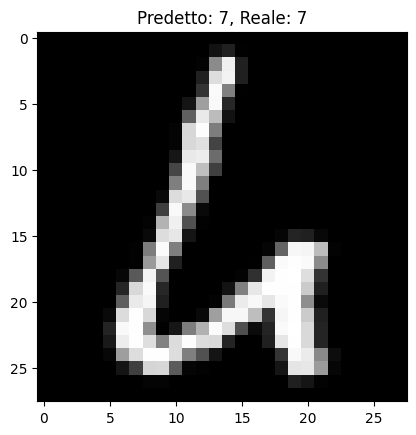

In [24]:
import random

random_number = random.randint(0, 20800)

# The fix is to index test_images with [random_number] instead of just random_number
predictions = model.predict(test_images[[random_number]]) # This creates a batch of size 1
plt.imshow(test_images[random_number].reshape(28,28), cmap="gray")
plt.title(f"Predetto: {np.argmax(predictions[0])}, Reale: {test_labels[random_number][0]}")

predicted_letter = chr(np.argmax(predictions[0]) + ord('a'))  # Converte la classe in lettera
real_letter = chr(test_labels[random_number][0] + ord('a'))  # Converte la classe in lettera
print(f"La classe predetta {np.argmax(predictions[0])} corrisponde alla lettera: {predicted_letter}")
print(f"La classe reale {test_labels[random_number][0]} corrisponde alla lettera: {real_letter}")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
La lettera predetta è: 17
La classe 17 corrisponde alla lettera: q


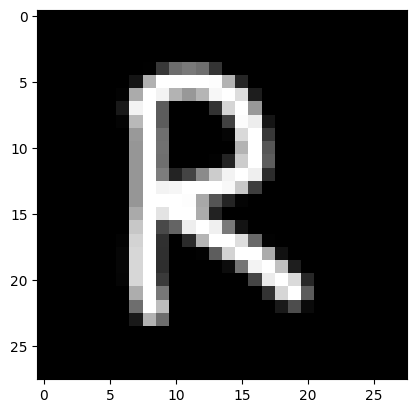

In [47]:
# prompt: test model with image called "L.png"

from PIL import Image
import numpy as np

# Carica l'immagine
img = Image.open("R.png").convert("L")  # Converti in scala di grigi

# Ridimensiona l'immagine a 28x28 pixel
img = img.resize((28, 28))

# Converti l'immagine in un array NumPy
img_array = np.array(img)

# Normalizza i pixel (da 0-255 a 0-1)
img_array = img_array / 255.0
img_array = 1 - img_array
plt.imshow(img_array, cmap="gray")
# Ridimensiona per la CNN (aggiunta del canale)
img_array = img_array.reshape(1, 28, 28, 1)
#plt.imshow(img_array, cmap="gray")
# Carica il modello
#model = tf.keras.models.load_model("letter_recognition_model.h5")

# Fai la previsione
prediction = model.predict(img_array)

# Stampa la previsione
predicted_digit = np.argmax(prediction)
print(f"La lettera predetta è: {predicted_digit}")
predicted_letter = chr(predicted_digit + ord('a') -1 )  # Converte la classe in lettera

print(f"La classe {predicted_digit} corrisponde alla lettera: {predicted_letter}")


Saving Screenshot 2025-03-06 224843.png to Screenshot 2025-03-06 224843.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
La lettera predetta è: 16
La classe 16 corrisponde alla lettera: p


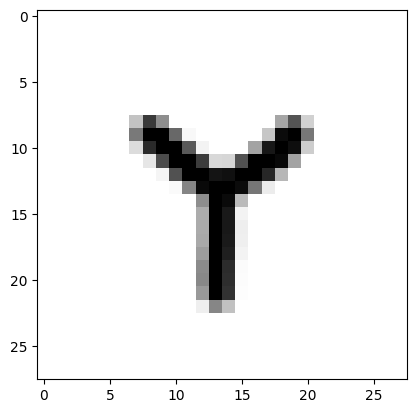

In [34]:
# prompt: test model with image called "L.png"

from PIL import Image
import numpy as np
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
# Carica l'immagine
img = Image.open(img_path).convert("L")  # Converti in scala di grigi

# Ridimensiona l'immagine a 28x28 pixel
img = img.resize((28, 28))

# Converti l'immagine in un array NumPy
img_array = np.array(img)

# Normalizza i pixel (da 0-255 a 0-1)
img_array = img_array / 255.0
plt.imshow(img_array, cmap="gray")
# Ridimensiona per la CNN (aggiunta del canale)
img_array = img_array.reshape(1, 28, 28, 1)
#plt.imshow(img_array, cmap="gray")
# Carica il modello
model = tf.keras.models.load_model("letter_recognition_model.h5")

# Fai la previsione
prediction = model.predict(img_array)

# Stampa la previsione
predicted_digit = np.argmax(prediction)
print(f"La lettera predetta è: {predicted_digit}")
predicted_class = predicted_digit  # La classe prevista dal modello
predicted_letter = chr(predicted_class + ord('a') -1 )  # Converte la classe in lettera

print(f"La classe {predicted_class} corrisponde alla lettera: {predicted_letter}")
